# Reading and splitting the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
data = pd.read_csv('processed_data.csv')

In [3]:
data

,unitNumber,timeCycles,setting1,setting2,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [4]:
# splitting 0.2 test
#X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='RUL'), data['RUL'], test_size=0.2, random_state=42)

In [5]:
# # Split the data into features and target variable
# X = data.drop(columns='RUL')
# y = data['RUL']

# # Split the data into training and testing sets based on 'unitNumber' column
# X_train = X[X['unitNumber'] <= 80]
# y_train = y[X['unitNumber'] <= 80]
# X_test = X[X['unitNumber'] > 80]
# y_test = y[X['unitNumber'] > 80]


In [6]:
# First, separate the features and target variable
X = data.drop(columns=['RUL', 'unitNumber'])  # Drop 'unitNumber' as well
y = data['RUL']

# Now, use 'unitNumber' to split the data into training and testing sets
train_indices = data['unitNumber'] <= 80
test_indices = data['unitNumber'] > 80

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

In [7]:
y_train

0        191
1        190
2        189
3        188
4        187
        ... 
16133      4
16134      3
16135      2
16136      1
16137      0
Name: RUL, Length: 16138, dtype: int64

# Models

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import time
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## No Grid Search

### Linear Regression

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}, R2: {r2_lr}")


Linear Regression MSE: 2823.3473701336034, R2: 0.5298441752372159


In [10]:
# Make predictions on the training data
y_train_pred_lr = lr.predict(X_train)

# Calculate R-squared on the training data
r2_train_lr = r2_score(y_train, y_train_pred_lr)

print(f"Linear Regression Training R2: {r2_train_lr}")


Linear Regression Training R2: 0.6917838609013659


### Lasso

In [11]:
# Initialize the Lasso Regression model
# The alpha parameter controls the degree of sparsity
lasso = Lasso(alpha=0.01)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso.predict(X_test)
# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}, R2: {r2_lasso}")

Lasso Regression MSE: 2826.465381713208, R2: 0.5293249506737292


In [12]:
# Make predictions on the training data
y_train_pred_lasso = lasso.predict(X_train)

# Calculate R-squared on the training data
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

print(f"Lasso Regression Training R2: {r2_train_lasso}")

Lasso Regression Training R2: 0.6916260206452208


### Ridge

In [13]:
# Initialize the Ridge Regression model
# The alpha parameter controls the strength of regularization
# Adjust the alpha value based on your specific dataset
ridge = Ridge(alpha=1.0)

# Fit the model on the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}, R2: {r2_ridge}")

Ridge Regression MSE: 2824.8512862092707, R2: 0.5295937367292204


In [14]:
# Make predictions on the training data
y_train_pred_ridge = ridge.predict(X_train)

# Calculate R-squared on the training data
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

print(f"Ridge Regression Training R2: {r2_train_ridge}")

Ridge Regression Training R2: 0.6916852099381837


### CART

In [15]:
cart = DecisionTreeRegressor()
cart.fit(X_train, y_train)
y_pred_cart = cart.predict(X_test)

# Evaluation
mse_cart = mean_squared_error(y_test, y_pred_cart)
r2_cart = r2_score(y_test, y_pred_cart)
print(f"CART MSE: {mse_cart}, R2: {r2_cart}")

CART MSE: 3669.087691965279, R2: 0.389007896020501


In [16]:
# Make predictions on the training data
y_train_pred_cart = cart.predict(X_train)

# Calculate R-squared on the training data
r2_train_cart = r2_score(y_train, y_train_pred_cart)

print(f"CART Training R2: {r2_train_cart}")

CART Training R2: 1.0


### Random Forest

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")

Random Forest MSE: 2293.359469797463, R2: 0.6181000168784954


In [18]:
# Make predictions on the training data
y_train_pred_rf = rf.predict(X_train)

# Calculate R-squared on the training data
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print(f"Random Forest Training R2: {r2_train_rf}")

Random Forest Training R2: 0.9656099344737207


### XGBoost

In [19]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}, R2: {r2_xgb}")


XGBoost MSE: 2446.0433970090644, R2: 0.5926744392518946


In [20]:
y_train_pred_xgb = xg_reg.predict(X_train)

# Calculate R-squared on the training data
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

print(f"XGBoost Training R2: {r2_train_xgb}")


XGBoost Training R2: 0.912666699065617


### Comparison

In [21]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'CART', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, mse_lasso, mse_ridge, mse_cart, mse_rf, mse_xgb],
    'R2 Score (Test)': [r2_lr, r2_lasso, r2_ridge, r2_cart, r2_rf, r2_xgb],
    'R2 Score (Train)': [r2_train_lr, r2_train_lasso, r2_train_ridge, r2_train_cart, r2_train_rf, r2_train_xgb]
})

# Saving updated results to a CSV file
results.to_csv('model_performance.csv', index=False)

print(results)

               Model          MSE  R2 Score (Test)  R2 Score (Train)
0  Linear Regression  2823.347370         0.529844          0.691784
1              Lasso  2826.465382         0.529325          0.691626
2              Ridge  2824.851286         0.529594          0.691685
3               CART  3669.087692         0.389008          1.000000
4      Random Forest  2293.359470         0.618100          0.965610
5            XGBoost  2446.043397         0.592674          0.912667


In [22]:
# sns.set(style="whitegrid", palette="pastel")
# palette = sns.color_palette("Set2")

# # MSE Plot
# plt.figure(figsize=(12, 7))
# mse_plot = sns.barplot(x='Model', y='MSE', data=filtered_results, palette=palette)
# plt.title('Mean Squared Error of Different Models', fontsize=16, fontweight='bold')
# plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
# plt.xlabel('Model', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# for p in mse_plot.patches:
#     mse_plot.annotate(format(p.get_height(), '.3f'), 
#                       (p.get_x() + p.get_width() / 2., p.get_height()), 
#                       ha = 'center', va = 'center', 
#                       xytext = (0, 9), 
#                       textcoords = 'offset points', fontsize=12)
# plt.savefig('mse_plot_no_gridsearch.png', dpi=300, bbox_inches='tight')
# plt.show()

# # Test R2 Score Plot
# plt.figure(figsize=(12, 7))
# r2_test_plot = sns.barplot(x='Model', y='R2 Score (Test)', data=filtered_results, palette=palette)
# plt.title('Test R2 Score of Different Models', fontsize=16, fontweight='bold')
# plt.ylabel('R2 Score (Test)', fontsize=14)
# plt.xlabel('Model', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# for p in r2_test_plot.patches:
#     r2_test_plot.annotate(format(p.get_height(), '.3f'), 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      xytext = (0, 9), 
#                      textcoords = 'offset points', fontsize=12)
# plt.savefig('r2_score_test_plot_no_gridsearch.png', dpi=300, bbox_inches='tight')
# plt.show()

# # Train R2 Score Plot
# plt.figure(figsize=(12, 7))
# r2_train_plot = sns.barplot(x='Model', y='R2 Score (Train)', data=filtered_results, palette=palette)
# plt.title('Training R2 Score of Different Models', fontsize=16, fontweight='bold')
# plt.ylabel('R2 Score (Train)', fontsize=14)
# plt.xlabel('Model', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# for p in r2_train_plot.patches:
#     r2_train_plot.annotate(format(p.get_height(), '.3f'), 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      xytext = (0, 9), 
#                      textcoords = 'offset points', fontsize=12)
# plt.savefig('r2_score_train_plot_no_gridsearch.png', dpi=300, bbox_inches='tight')
# plt.show()


## With Grid Search

### CART

In [23]:
# Define the parameter grid for CART
param_grid_cart = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Regressor
cart = DecisionTreeRegressor()

# Initialize GridSearchCV
grid_search_cart = GridSearchCV(estimator=cart, param_grid=param_grid_cart, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_cart.fit(X_train, y_train)

# Best parameters
print("Best parameters for CART: ", grid_search_cart.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best parameters for CART:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


### Random Forest

In [24]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# import itertools
# import time

# # Define the parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Calculate total number of combinations
# total_combinations = [len(param_grid_rf[param]) for param in param_grid_rf]
# total_combinations = np.prod(total_combinations) * 3  # Multiply by the number of CV folds

# print(f"Total combinations to test: {total_combinations}")

# # Initialize the Random Forest Regressor
# rf = RandomForestRegressor()

# # Initialize GridSearchCV with verbose set to 10 for more frequent updates
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=10, scoring='neg_mean_squared_error')

# # Start the timer
# start_time = time.time()

# # Fit the grid search to the data
# grid_search_rf.fit(X_train, y_train)

# # End the timer
# end_time = time.time()

# # Calculate and print the total duration
# total_duration = end_time - start_time
# print(f"GridSearchCV completed in {total_duration:.2f} seconds")

# # Best parameters
# print("Best parameters for Random Forest: ", grid_search_rf.best_params_)



In [25]:
# Had to run on the clusters and got these results for best RF

# Manually setting the best parameters with an updated max_features
best_params_rf = {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
grid_search_rf = RandomForestRegressor(**best_params_rf)

# Fit the model on the training data
grid_search_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, max_features=None, n_estimators=200)

### XGBoost

In [26]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 1]
}

# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xg_reg, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for XGBoost:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


### Evaluating

In [27]:
y_pred_gs_cart_test = grid_search_cart.best_estimator_.predict(X_test)
mse_gs_cart = mean_squared_error(y_test, y_pred_gs_cart_test)
r2_gs_cart_test = r2_score(y_test, y_pred_gs_cart_test)

# Evaluate the optimized CART model on the training data
y_pred_gs_cart_train = grid_search_cart.best_estimator_.predict(X_train)
r2_gs_cart_train = r2_score(y_train, y_pred_gs_cart_train)

In [29]:
# Evaluate the optimized Random Forest model on the test data
y_pred_gs_rf_test = grid_search_rf.predict(X_test)
mse_gs_rf = mean_squared_error(y_test, y_pred_gs_rf_test)
r2_gs_rf_test = r2_score(y_test, y_pred_gs_rf_test)

# Evaluate the optimized Random Forest model on the training data
y_pred_gs_rf_train = grid_search_rf.predict(X_train)
r2_gs_rf_train = r2_score(y_train, y_pred_gs_rf_train)


In [30]:
# Evaluate the optimized model on the test data
y_pred_gs_xgb_test = grid_search_xgb.best_estimator_.predict(X_test)
mse_gs_xgb = mean_squared_error(y_test, y_pred_gs_xgb_test)
r2_gs_xgb_test = r2_score(y_test, y_pred_gs_xgb_test)

# Evaluate the optimized model on the training data
y_pred_gs_xgb_train = grid_search_xgb.best_estimator_.predict(X_train)
r2_gs_xgb_train = r2_score(y_train, y_pred_gs_xgb_train)

In [31]:
# Creating the DataFrame
results_optimized_gs = pd.DataFrame({
    'Model': ['GS CART', 'GS Random Forest', 'GS XGBoost'],
    'MSE': [mse_gs_cart, mse_gs_rf, mse_gs_xgb],
    'R2 Score (Test)': [r2_gs_cart_test, r2_gs_rf_test, r2_gs_xgb_test],
    'R2 Score (Train)': [r2_gs_cart_train, r2_gs_rf_train, r2_gs_xgb_train]
})

print(results_optimized_gs)

              Model          MSE  R2 Score (Test)  R2 Score (Train)
0           GS CART  2640.918439         0.560223          0.818817
1  GS Random Forest  2294.059291         0.617983          0.966361
2        GS XGBoost  2395.320849         0.601121          0.757875


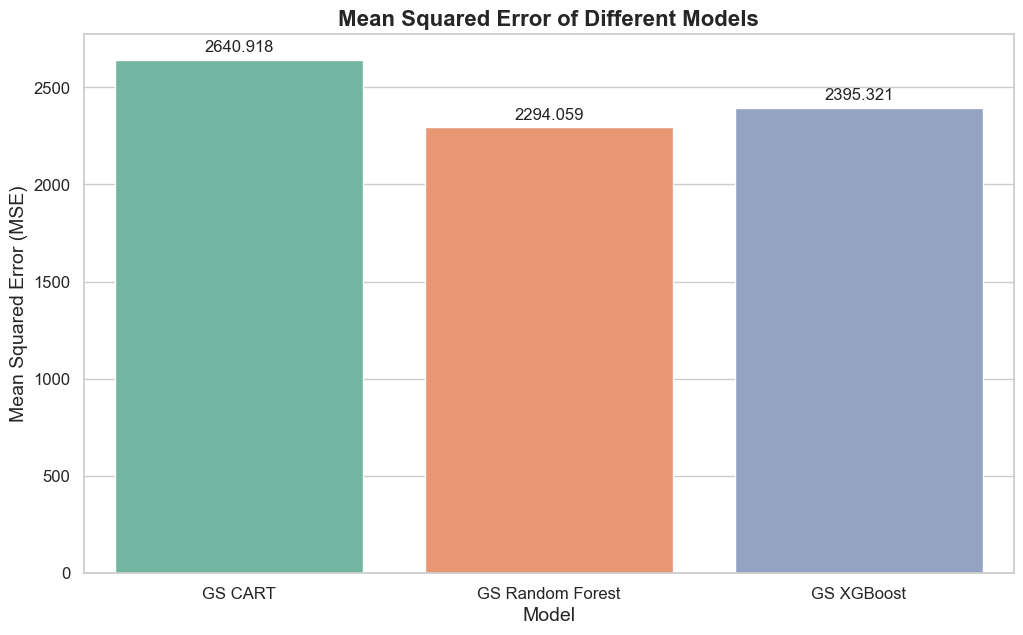

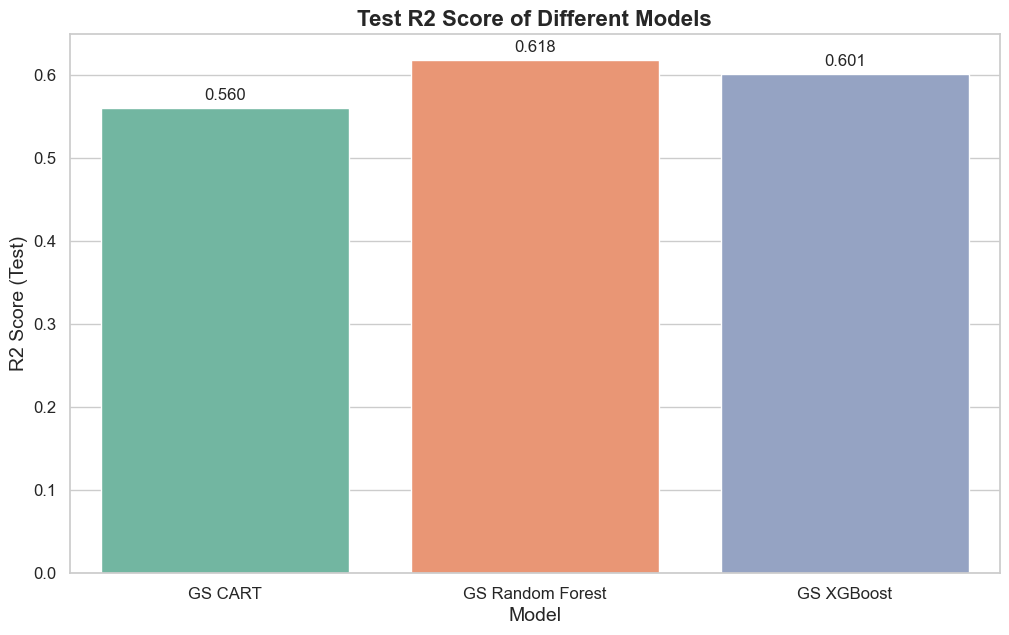

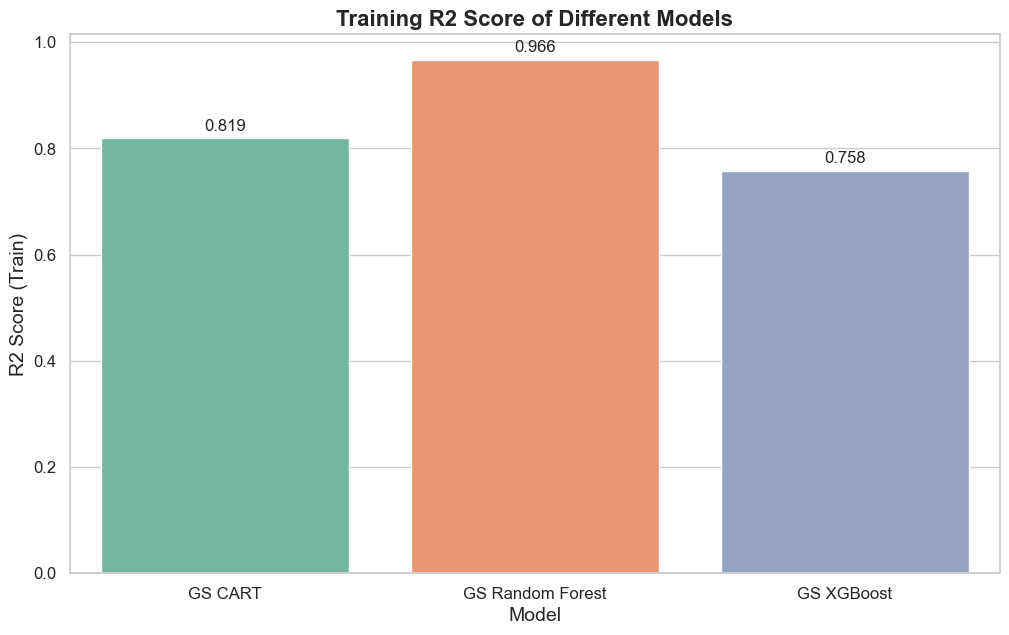

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel")
palette = sns.color_palette("Set2")

# MSE Plot
plt.figure(figsize=(12, 7))
mse_plot = sns.barplot(x='Model', y='MSE', data=results_optimized_gs, palette=palette)
plt.title('Mean Squared Error of Different Models', fontsize=16, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotating with the MSE values
for p in mse_plot.patches:
    mse_plot.annotate(format(p.get_height(), '.3f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points', fontsize=12)

plt.savefig('mse_plot_gridsearch.png', dpi=300, bbox_inches='tight')
plt.show()

# R2 Score Plot for Test Data
plt.figure(figsize=(12, 7))
r2_test_plot = sns.barplot(x='Model', y='R2 Score (Test)', data=results_optimized_gs, palette=palette)
plt.title('Test R2 Score of Different Models', fontsize=16, fontweight='bold')
plt.ylabel('R2 Score (Test)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotating the bars with the Test R2 values
for p in r2_test_plot.patches:
    r2_test_plot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points', fontsize=12)

plt.savefig('r2_score_test_plot_gridsearch.png', dpi=300, bbox_inches='tight')
plt.show()

# R2 Score Plot for Training Data
plt.figure(figsize=(12, 7))
r2_train_plot = sns.barplot(x='Model', y='R2 Score (Train)', data=results_optimized_gs, palette=palette)
plt.title('Training R2 Score of Different Models', fontsize=16, fontweight='bold')
plt.ylabel('R2 Score (Train)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotating the bars with the Training R2 values
for p in r2_train_plot.patches:
    r2_train_plot.annotate(format(p.get_height(), '.3f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points', fontsize=12)

plt.savefig('r2_score_train_plot_gridsearch.png', dpi=300, bbox_inches='tight')
plt.show()


### Feature Importance

In [42]:
# Feature names
feature_names = X_train.columns

# CART Model Feature Importances
# Accessing the best estimator from grid_search_cart
best_cart = grid_search_cart.best_estimator_
importances_cart = best_cart.feature_importances_
df_importances_cart = pd.DataFrame({'Feature': feature_names, 'Importance': importances_cart}).sort_values(by='Importance', ascending=False)

# Random Forest Model Feature Importances
# Assuming rf_optimized is the best estimator or a fitted RandomForest model
importances_rf = grid_search_rf.feature_importances_
df_importances_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)

# XGBoost Model Feature Importances
# Accessing the best estimator from grid_search_xgb
best_xgb = grid_search_xgb.best_estimator_
importances_xgb = best_xgb.feature_importances_
df_importances_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': importances_xgb}).sort_values(by='Importance', ascending=False)

# Display the top features for each model
print("CART Model Feature Importances:\n", df_importances_cart.head())
print("\nRandom Forest Model Feature Importances:\n", df_importances_rf.head())
print("\nXGBoost Model Feature Importances:\n", df_importances_xgb.head())



CART Model Feature Importances:
        Feature  Importance
0   timeCycles    0.701674
9         Ps30    0.155394
8           Nc    0.033712
10         phi    0.023909
5          T50    0.010639

Random Forest Model Feature Importances:
        Feature  Importance
0   timeCycles    0.587689
9         Ps30    0.119412
5          T50    0.046470
8           Nc    0.035518
10         phi    0.027215

XGBoost Model Feature Importances:
        Feature  Importance
0   timeCycles    0.267664
5          T50    0.208987
9         Ps30    0.147940
10         phi    0.087140
6          P30    0.060189


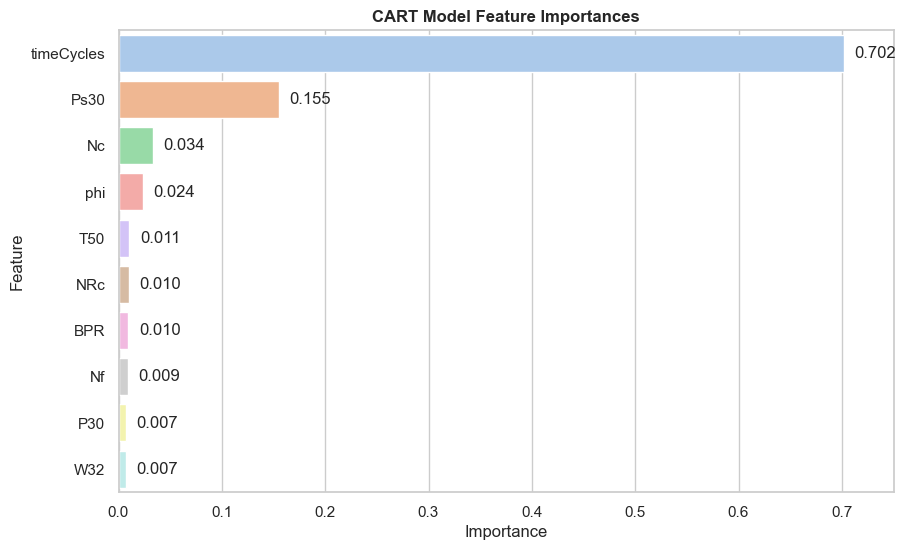

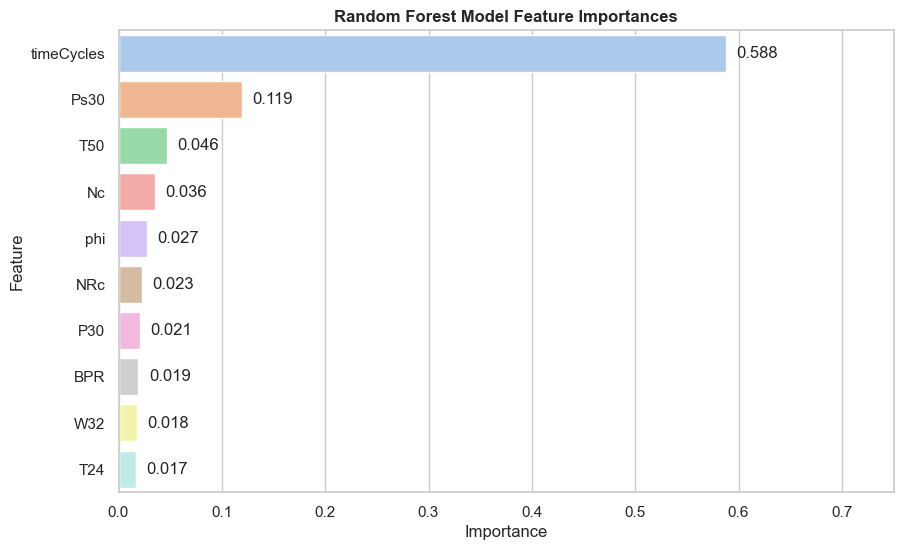

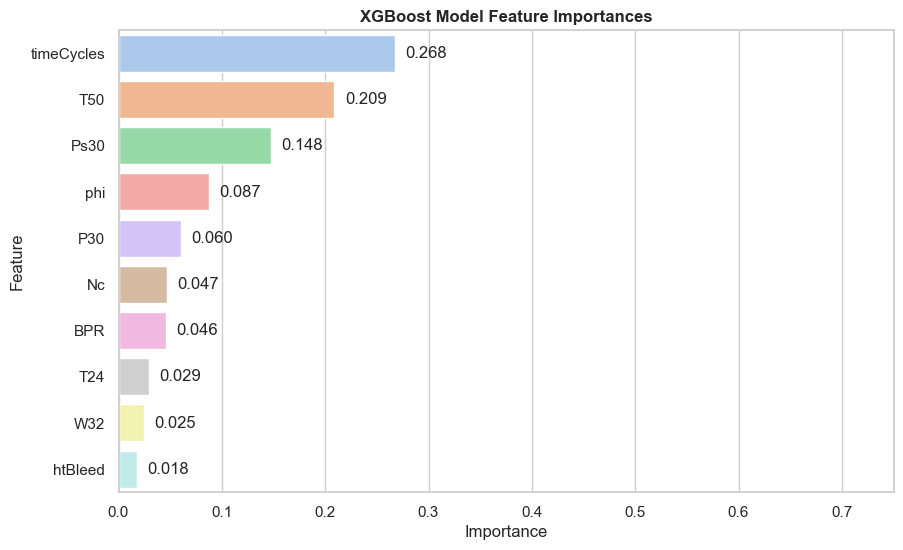

In [43]:
def plot_and_save_feature_importances(df_importances, title, filename):
    plt.figure(figsize=(10, 6))
    plot = sns.barplot(x='Importance', y='Feature', data=df_importances.head(10))
    plt.title(title, fontweight='bold')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.xlim(0, 0.75) 

    # Annotating each bar with the value of importance
    for p in plot.patches:
        width = p.get_width()    # get bar length
        plt.text(width + 0.01,   # set the text at 1 unit right of the bar
                 p.get_y() + p.get_height() / 2, # get Y coordinate + half of bar height
                 '{:1.3f}'.format(width), # set variable to display, 2 decimals
                 ha = 'left',   # horizontal alignment
                 va = 'center') # vertical alignment
    
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save the plot as an image file
    plt.show()

# Plotting and saving feature importances for each model
plot_and_save_feature_importances(df_importances_cart, 'CART Model Feature Importances', 'cart_feature_importances.png')
plot_and_save_feature_importances(df_importances_rf, 'Random Forest Model Feature Importances', 'random_forest_feature_importances.png')
plot_and_save_feature_importances(df_importances_xgb, 'XGBoost Model Feature Importances', 'xgboost_feature_importances.png')



In [44]:
# Combined DataFrame
combined_results = pd.concat([results, results_optimized_gs], ignore_index=True)

# Saving the combined results to a CSV file
combined_results.to_csv('combined_model_results.csv', index=False)

print(combined_results)


               Model          MSE  R2 Score (Test)  R2 Score (Train)
0  Linear Regression  2823.347370         0.529844          0.691784
1              Lasso  2826.465382         0.529325          0.691626
2              Ridge  2824.851286         0.529594          0.691685
3               CART  3669.087692         0.389008          1.000000
4      Random Forest  2293.359470         0.618100          0.965610
5            XGBoost  2446.043397         0.592674          0.912667
6            GS CART  2640.918439         0.560223          0.818817
7   GS Random Forest  2294.059291         0.617983          0.966361
8         GS XGBoost  2395.320849         0.601121          0.757875


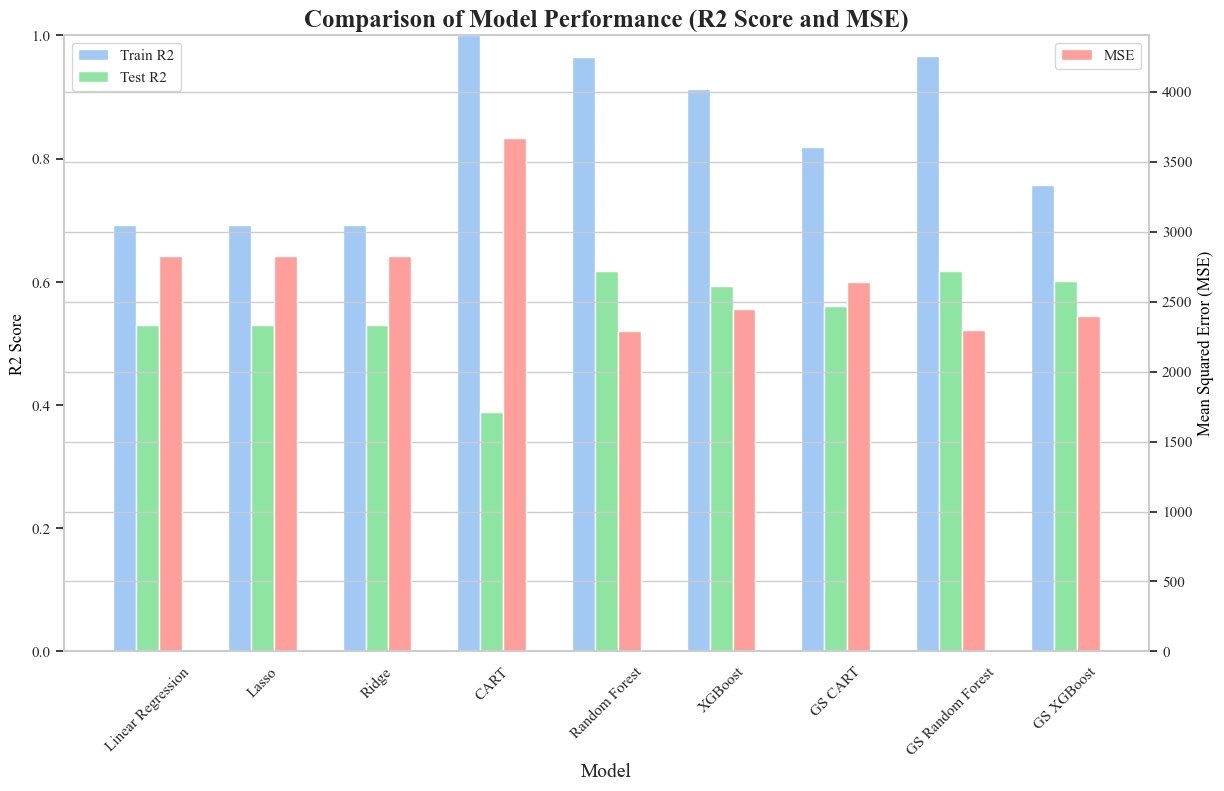

<Figure size 1200x400 with 0 Axes>

In [47]:
plt.rcParams['font.family'] = 'Times New Roman'

# Setting up the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))
#plt.figure(figsize=(8, 4))
plt.grid(False)
plt.title('Comparison of Model Performance (R2 Score and MSE)', family='Times New Roman', fontsize = 18, weight = 'bold')

# Models
models = combined_results['Model']

# R2 Scores and MSE
r2_train = combined_results['R2 Score (Train)']
r2_test = combined_results['R2 Score (Test)']
mse = combined_results['MSE']

# Bar width and positions
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting R2 scores on the left y-axis
ax1.bar(r1, r2_train, color='b', width=bar_width, label='Train R2')
ax1.bar(r2, r2_test, color='g', width=bar_width, label='Test R2')

# Setting the y-axis label for R2 scores
ax1.set_ylabel('R2 Score', color='black')
ax1.tick_params(axis='y')
ax1.set_ylim([0, 1])  # Adjust as needed
ax1.set_xticks([r + bar_width for r in range(len(r1))])
ax1.set_xticklabels(models)
plt.xticks(rotation=45)
ax1.set_xlabel('Model', fontsize = 14)

# # Creating another y-axis for MSE
ax2 = ax1.twinx()

# Plotting MSE on the right y-axis
ax2.bar(r3, mse, color='r', width=bar_width, label='MSE')

# Setting the y-axis label for MSE
ax2.set_ylabel('Mean Squared Error (MSE)', color='black')
ax2.tick_params(axis='y')
ax2.set_ylim([0, max(mse) * 1.2])  # Adjust as needed

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding a title
plt.figure(figsize=(12, 4))
# Save the plot
plt.savefig('combined_model_performance.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


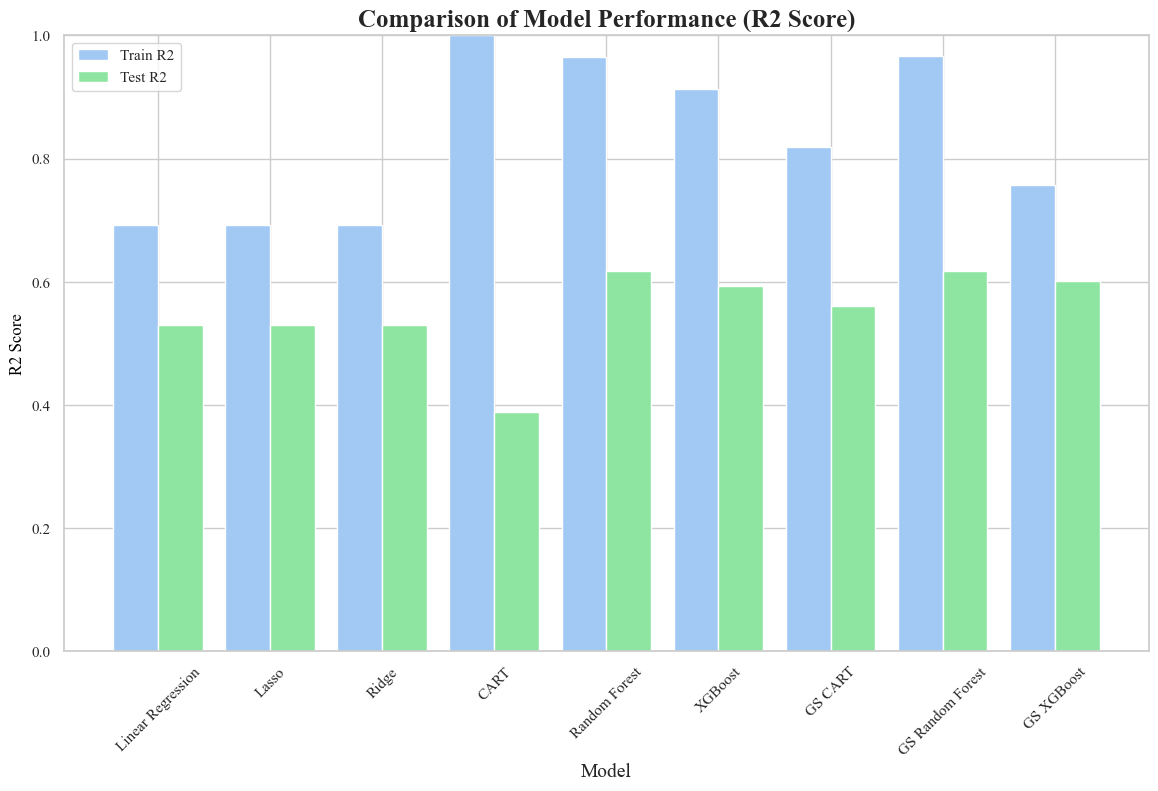

In [58]:
plt.rcParams['font.family'] = 'Times New Roman'

# Setting up the figure and axes for R2 Score chart
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.grid(True)
plt.title('Comparison of Model Performance (R2 Score)', family='Times New Roman', fontsize=18, weight='bold')

# Models
models = combined_results['Model']

# R2 Scores
r2_train = combined_results['R2 Score (Train)']
r2_test = combined_results['R2 Score (Test)']

# Bar width and positions
bar_width = 0.4
r1 = np.arange(len(models))

# Plotting R2 scores on the left y-axis
ax1.bar(r1, r2_train, color='b', width=bar_width, label='Train R2')
ax1.bar(r1 + bar_width, r2_test, color='g', width=bar_width, label='Test R2')

# Setting the y-axis label for R2 scores
ax1.set_ylabel('R2 Score', color='black')
ax1.tick_params(axis='y')
ax1.set_ylim([0, 1])  # Adjust as needed
ax1.set_xticks([r + bar_width / 2 for r in range(len(r1))])
ax1.set_xticklabels(models, rotation=45)
ax1.set_xlabel('Model', fontsize=14)

# Adding a legend
ax1.legend(loc='upper left')

# Save the R2 Score chart
plt.savefig('model_performance_r2_score.png', dpi=300, bbox_inches='tight')

# Show the R2 Score chart
plt.show()


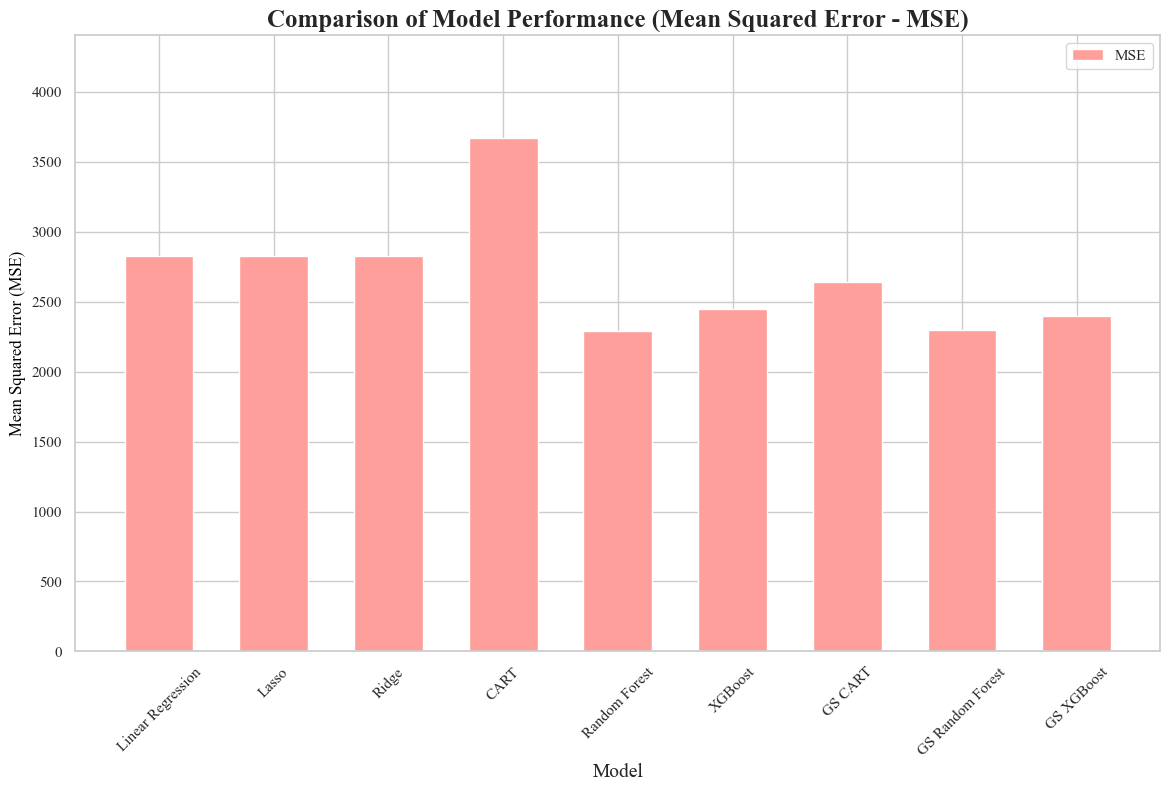

In [68]:
# Setting up the figure and axes for MSE chart
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.grid(True)
plt.title('Comparison of Model Performance (Mean Squared Error - MSE)', family='Times New Roman', fontsize=18, weight='bold')

# Models
models = combined_results['Model']

# MSE
mse = combined_results['MSE']

# Bar width and positions
bar_width = 0.6
r1 = np.arange(len(models))

# Plotting MSE on the right y-axis
ax1.bar(r1, mse, color='r', width=bar_width, label='MSE')

# Setting the y-axis label for MSE
ax1.set_ylabel('Mean Squared Error (MSE)', color='black')
ax1.tick_params(axis='y')
ax1.set_ylim([0, max(mse) * 1.2])  # Adjust as needed
ax1.set_xticks([r for r in range(len(r1))])
ax1.set_xticklabels(models, rotation=45)
ax1.set_xlabel('Model', fontsize=14)

# Adding a legend
ax1.legend(loc='upper right')

# Save the MSE chart
plt.savefig('model_performance_mse.png', dpi=300, bbox_inches='tight')

# Show the MSE chart
plt.show()


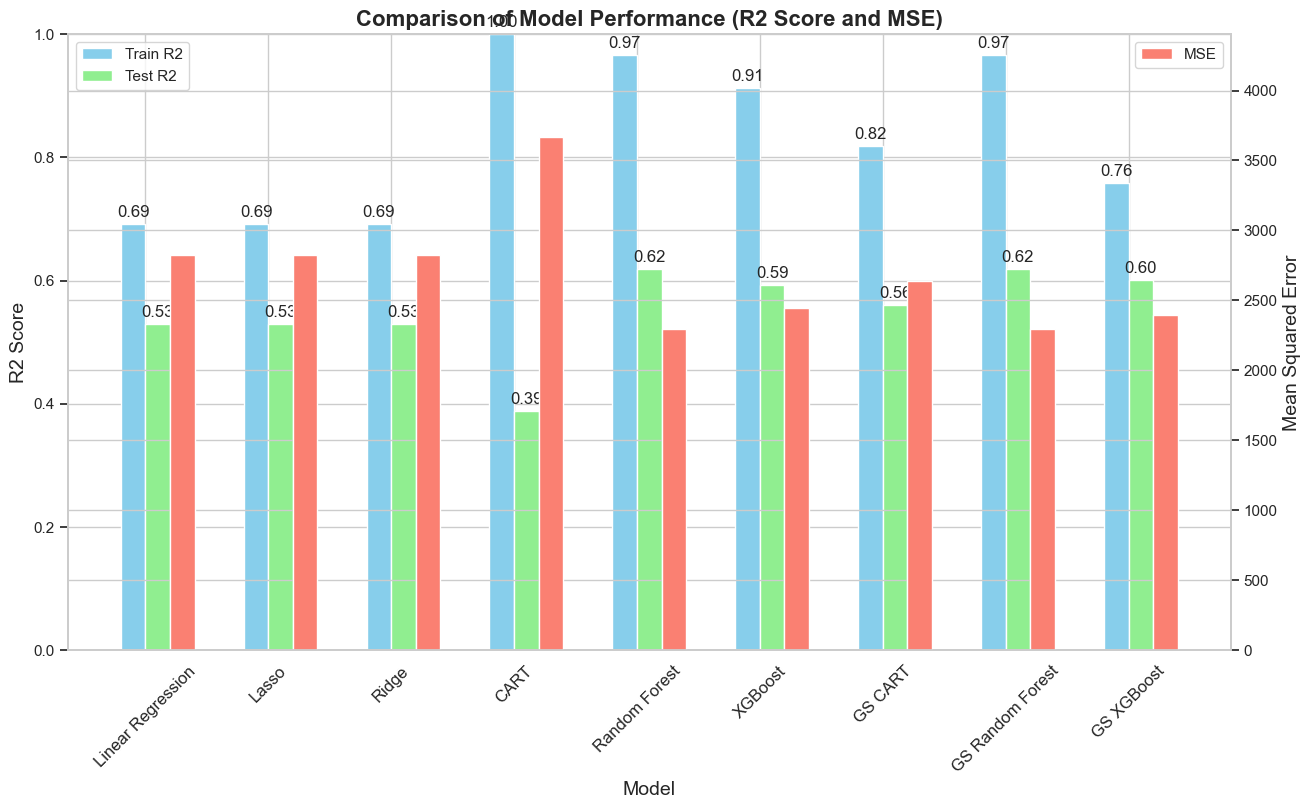

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid", palette="pastel")
palette = sns.color_palette("Set2")

# Data Preparation
models = combined_results['Model']
r2_train = combined_results['R2 Score (Train)']
r2_test = combined_results['R2 Score (Test)']
mse = combined_results['MSE']

# Plot setup
fig, ax1 = plt.subplots(figsize=(15, 8))
bar_width = 0.2
index = np.arange(len(models))

# Bars for R2 Scores
bars_train_r2 = ax1.bar(index, r2_train, bar_width, label='Train R2', color='skyblue')
bars_test_r2 = ax1.bar(index + bar_width, r2_test, bar_width, label='Test R2', color='lightgreen')

# First y-axis (left)
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('R2 Score', fontsize=14)
ax1.set_ylim(0, 1)  # Assuming R2 score is between 0 and 1
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models, rotation=45, fontsize=12)
ax1.legend(loc='upper left')

# Second y-axis (right)
ax1 = ax1.twinx()
bars_mse = ax1.bar(index + 2 * bar_width, mse, bar_width, label='MSE', color='salmon')
ax1.set_ylabel('Mean Squared Error', fontsize=14)
ax1.set_ylim(0, max(mse) * 1.2)  # Adjust y-axis limit for MSE
ax1.legend(loc='upper right')

# Adding data labels
def add_data_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.annotate('{}'.format(format(height, '.2f')),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_data_labels(bars_train_r2)
add_data_labels(bars_test_r2)
add_data_labels(bars_mse)

# Title
plt.title('Comparison of Model Performance (R2 Score and MSE)', fontsize=16, fontweight='bold')

# Save and show plot
plt.savefig('combined_model_performance_custom.png', dpi=300, bbox_inches='tight')
plt.show()


In [50]:
# Assuming you have these prediction arrays
y_pred_gs_cart = grid_search_cart.predict(X_test)
y_pred_gs_rf = grid_search_rf.predict(X_test)
y_pred_gs_xgb = grid_search_xgb.predict(X_test)

# Updated DataFrame with predictions from all models
prediction_df = pd.DataFrame({
    'Actual': y_test, 
    'LR': y_pred_lr, 
    'Lasso': y_pred_lasso,
    'Ridge': y_pred_ridge,
    'CART': y_pred_cart, 
    'RF': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'GS CART': y_pred_gs_cart,
    'GS RF': y_pred_gs_rf,
    'GS XGBoost': y_pred_gs_xgb
})


In [51]:
prediction_df

,Actual,LR,Lasso,Ridge,CART,RF,XGBoost,GS CART,GS RF,GS XGBoost
16138,239,169.103929,169.060380,168.701269,157.0,213.67,201.502548,148.666667,213.09119,182.952148
16139,238,165.675840,165.999559,165.470726,167.0,184.77,208.700012,184.079470,186.29619,180.188446
16140,237,164.886774,164.250774,163.977478,232.0,192.12,196.470917,184.079470,190.81500,179.194565
16141,236,164.657995,164.572114,164.676355,233.0,194.12,196.135193,181.431373,190.71000,180.295853
16142,235,163.858745,162.544576,163.102319,269.0,190.36,165.566544,184.079470,189.42500,183.338013
...,...,...,...,...,...,...,...,...,...,...
20626,4,-1.656510,-1.486295,-1.136794,3.0,7.73,6.359396,10.328125,6.12000,16.901596
20627,3,-3.012479,-2.461220,-1.992734,5.0,3.74,6.088854,2.110000,3.66000,16.901596
20628,2,-9.537046,-8.512124,-9.128074,14.0,5.15,5.132136,4.031250,5.68500,17.159031
20629,1,-12.003913,-12.477350,-12.538845,9.0,2.58,2.754243,4.000000,3.33500,16.754944


In [52]:
prediction_df.to_csv('model_predictions.csv', index=False)